# HW2 - Basic Data Processing for Data Mining

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 5/24 (Thur)  11:59 AM 

------------------------------------------
## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [4]:
import sys
sys.version

'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

## Python Assingment HW2 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [5]:
%matplotlib inline 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
####################################
from itertools import chain

## Problem1. Web Crawling & Processing

### Problem 1-1 Fetching the Wikipedia site

#### print html code of presented page
#### Use requests library
> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_2016_Summer_Olympics_medal_winners"

###YOUR CODE HERE###
wiki_r=requests.get(url)
print(wiki_r.text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_2016_Summer_Olympics_medal_winners","wgTitle":"List of 2016 Summer Olympics medal winners","wgCurRevisionId":839965383,"wgRevisionId":839965383,"wgArticleId":44675550,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2016 Summer Olympics","Lists of Summer Olympic medalists by year","Medalists at the 2016 Summer Olympics","Rio de Janeiro (city)-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparato

### Problem 1-2 Parsing html data
#### Data that we are going to use is table titled below:
#### Title: Swimming men's events
#### Use BeautifulSoup libary

*print html code of parsed table: Swimming men's events*

> *`<table border="" class="class1 class2" style="font-size: 100%">`*<br/>
> *`<tr style="text-align: center;">`*<br/>
> *`<th scope="col" style="width: 120px;">Event</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

__*hint: class/id can be assigned for elements of html.*__

In [4]:
#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"

###YOUR CODE HERE###
#step1: look at html source!"
soup=BeautifulSoup(wiki_r.text, "lxml")
#step2: get all tables"
tables=soup.find_all('table', {'class': 'wikitable'})
#step3: get table we care about"
swimmingMen=tables[36]
print(swimmingMen)

<table border="1" class="wikitable plainrowheaders" style="font-size: 100%">
<tr style="text-align: center;">
<th scope="col" style="width: 120px;">Event</th>
<th colspan="2" scope="col" style="width: 200px; background: #FFD700;">Gold</th>
<th colspan="2" scope="col" style="width: 200px; background: #CCCCCC;">Silver</th>
<th colspan="2" scope="col" style="width: 200px; background: #CC9966;">Bronze</th>
</tr>
<tr>
<td>50 m freestyle<br/>
<span class="noprint" style="font-size:90%; font-style:italic;"><a href="/wiki/Swimming_at_the_2016_Summer_Olympics_%E2%80%93_Men%27s_50_metre_freestyle" title="Swimming at the 2016 Summer Olympics – Men's 50 metre freestyle">details</a></span></td>
<td><a href="/wiki/Anthony_Ervin" title="Anthony Ervin">Anthony Ervin</a><br/>
<img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.w

### Problem 1-3 Extracting data and filling it into a dictionary(Python data stucture)

#### Extract  countries and medals from "Athletics - Women" table and store it in dictionary.
*Please print parsed dictionary at the end of code*

#### Shape of Dictionary
__Include only once if athlete have received the same medal more than once. ex) 100m gold Bolt, 200m gold Bolt -> gold: Bolt__
- { *country_name*: { *medal type*: [*athlete name,* *athlete name,* *athlete name,* ...], ... }}
- e.g. {'Jamaica': {'Gold': ['Elaine Thompson', 'Shaunae Miller'...], 'Silver': [...], 'Bronze': [...] }, 'United States': ... }

*__hint: Use above problem's code to get Atheletics - Women table__*

In [5]:
# extract headings and actual data and combine data into single dict

###YOUR CODE HERE###

athleticsW_Dic = {} #Athletics-Women Dictionary
athleticsWomen=tables[2]
athleticsW_R=athleticsWomen.find_all('tr')

###개인 경기###
for n1 in chain(range(1, 12), range(15, len(athleticsW_R))):
    n2=0
    athleticsW_E=athleticsW_R[n1].find_all('td')
    for j in athleticsW_E:
        n2=n2+1
        if(n2%2 == 0):
            country=j.text.split("\n")[1].strip()
            athlete=j.text.split("\n")[0]
            if(n2 == 2):
                if(country in athleticsW_Dic): #이미 나라가 dic 안에 존재한다면
                    athleticsW_Dic[country]['Gold'].append(athlete)
                else:
                    athleticsW_Dic[country]={}
                    athleticsW_Dic[country]['Gold']=[athlete]
                    athleticsW_Dic[country]['Silver']=[]
                    athleticsW_Dic[country]['Bronze']=[]
            if(n2 == 4):
                if(country in athleticsW_Dic): #이미 나라가 dic 안에 존재한다면
                    athleticsW_Dic[country]['Silver'].append(athlete)
                else:
                    athleticsW_Dic[country]={}
                    athleticsW_Dic[country]['Gold']=[]
                    athleticsW_Dic[country]['Silver']=[athlete]
                    athleticsW_Dic[country]['Bronze']=[]
            if(n2 == 6):
                if(country in athleticsW_Dic): #이미 나라가 dic 안에 존재한다면
                    athleticsW_Dic[country]['Bronze'].append(athlete)
                else:
                    athleticsW_Dic[country]={}
                    athleticsW_Dic[country]['Gold']=[]
                    athleticsW_Dic[country]['Silver']=[]
                    athleticsW_Dic[country]['Bronze']=[athlete]

###단체 경기###
for n1 in range(13, 15):
    n2=0
    athleticsW_E=athleticsW_R[n1].find_all('td')
    for j in athleticsW_E:
        n2=n2+1
        if(n2%2 == 0):
            country=j.text.split("\n")[0].split("(")[0].strip()
            athlete=j.text.split("\n")[1:]
            for n3 in range(0, len(athlete)):
                athlete[n3]=athlete[n3].rstrip('*')
            if(n2 == 2):
                if(country in athleticsW_Dic): #이미 나라가 dic 안에 존재한다면
                    athleticsW_Dic[country]['Gold']=athleticsW_Dic[country]['Gold']+athlete
                else:
                    athleticsW_Dic[country]={}
                    athleticsW_Dic[country]['Gold']=athlete
                    athleticsW_Dic[country]['Silver']=[]
                    athleticsW_Dic[country]['Bronze']=[]
            if(n2 == 4):
                if(country in athleticsW_Dic): #이미 나라가 dic 안에 존재한다면
                    athleticsW_Dic[country]['Silver']=athleticsW_Dic[country]['Silver']+athlete
                else:
                    athleticsW_Dic[country]={}
                    athleticsW_Dic[country]['Gold']=[]
                    athleticsW_Dic[country]['Silver']=athlete
                    athleticsW_Dic[country]['Bronze']=[]
            if(n2 == 6):
                if(country in athleticsW_Dic): #이미 나라가 dic 안에 존재한다면
                    athleticsW_Dic[country]['Bronze']=athleticsW_Dic[country]['Bronze']+athlete
                else:
                    athleticsW_Dic[country]={}
                    athleticsW_Dic[country]['Gold']=[]
                    athleticsW_Dic[country]['Silver']=[]
                    athleticsW_Dic[country]['Bronze']=athlete
        
###list 속 중복 값 제거하기
for val1 in athleticsW_Dic:
    for val2 in athleticsW_Dic[val1]:
        athleticsW_Dic[val1][val2] = list(set(athleticsW_Dic[val1][val2]))
print(athleticsW_Dic)



{'Jamaica': {'Gold': ['Elaine Thompson'], 'Silver': ['Anneisha McLaughlin-Whilby', 'Novlene Williams-Mills', 'Christania Williams', 'Shelly-Ann Fraser-Pryce', 'Elaine Thompson', 'Stephenie Ann McPherson', 'Chrisann Gordon', 'Shericka Jackson', 'Veronica Campbell-Brown', 'Sashalee Forbes', 'Simone Facey', 'Christine Day'], 'Bronze': ['Shelly-Ann Fraser-Pryce', 'Shericka Jackson']}, 'United States': {'Gold': ['Phyllis Francis', 'Tori Bowie', 'Francena McCorory', 'Natasha Hastings', 'Morolake Akinosun', 'Courtney Okolo', 'English Gardner', 'Tianna Bartoletta', 'Dalilah Muhammad', 'Michelle Carter', 'Taylor Ellis-Watson', 'Brianna Rollins', 'Allyson Felix'], 'Silver': ['Britney Reese', 'Nia Ali', 'Tori Bowie', 'Sandi Morris', 'Allyson Felix'], 'Bronze': ['Emma Coburn', 'Tori Bowie', 'Ashley Spencer', 'Jennifer Simpson', 'Kristi Castlin']}, 'Netherlands': {'Gold': [], 'Silver': ['Dafne Schippers'], 'Bronze': []}, 'Bahamas': {'Gold': ['Shaunae Miller'], 'Silver': [], 'Bronze': []}, 'South Af

### Problem 1-4 Creating a dataframe(Python data structure) from a dictionary

#### Use Dictionary that you made in problem 1-3

#### Use Pandas library

__* Shape of dataframe must be like following table.__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [6]:
# create dataframe
# Use the following code
# indices: countries, columns: Medal type

###YOUR CODE HERE###

###list to string
athleticsW_Dic_str=athleticsW_Dic.copy()
for val1 in athleticsW_Dic_str:
    for val2 in athleticsW_Dic_str[val1]:
        if(type(athleticsW_Dic_str[val1][val2])==list):
            athleticsW_Dic_str[val1][val2] = ", ".join(athleticsW_Dic_str[val1][val2])

df = pd.DataFrame.from_dict(athleticsW_Dic_str, orient='index')

##df.replace('', np.nan, inplace=True)
df



,Gold,Silver,Bronze
Bahamas,Shaunae Miller,,
Bahrain,Ruth Jebet,Eunice Kirwa,
Belgium,Nafissatou Thiam,,
Bulgaria,,Mirela Demireva,
Burundi,,Francine Niyonsaba,
Canada,,,Brianne Theisen-Eaton
China,Liu Hong,Zhang Wenxiu,Lü Xiuzhi
Colombia,Caterine Ibargüen,,
Croatia,"Sandra Perković, Sara Kolak",,Blanka Vlašić
Cuba,,,Denia Caballero


### Problem 1-5 Sort Data Frame
### Sort Country names by number of Gold medal athletes (Descending order)
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [7]:
###YOUR CODE HERE###

num_gold_dic = {}
gold_index = []
for val1 in athleticsW_Dic:
    temp_list=athleticsW_Dic[val1]['Gold'].split(", ")
    if(temp_list[0]==''):
        temp_list.pop(0)
    num_gold_dic[val1]=len(temp_list)

for k1,v1 in sorted(num_gold_dic.items(), key =lambda num_gold_dic:num_gold_dic[1]):
    gold_index.insert(0, k1)

df_gold = df.reindex(gold_index)
#df3 = df2.sort_values('Gold', ascending=False)
df_gold

,Gold,Silver,Bronze
United States,"Phyllis Francis, Tori Bowie, Francena McCorory...","Britney Reese, Nia Ali, Tori Bowie, Sandi Morr...","Emma Coburn, Tori Bowie, Ashley Spencer, Jenni..."
Kenya,"Faith Kipyegon, Vivian Cheruiyot, Jemima Sumgong","Vivian Cheruiyot, Hellen Onsando Obiri, Hyvin ...",Margaret Wambui
Croatia,"Sandra Perković, Sara Kolak",,Blanka Vlašić
Belgium,Nafissatou Thiam,,
Poland,Anita Włodarczyk,,
Colombia,Caterine Ibargüen,,
Greece,Ekaterini Stefanidi,,
Spain,Ruth Beitia,,
China,Liu Hong,Zhang Wenxiu,Lü Xiuzhi
Bahrain,Ruth Jebet,Eunice Kirwa,


### Problem 1-6 Handle Data Frame
### Which country has the most bronze medals in Atheletics - Women? 
- __Make sub data frame__
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>Tori Bowie ...</td>
</table>

In [8]:
###YOUR CODE HERE###
num_bronze_dic = {}
bronze_index = []
for val1 in athleticsW_Dic:
    temp_list=athleticsW_Dic[val1]['Bronze'].split(", ")
    if(temp_list[0]==''):
        temp_list.pop(0)
    num_bronze_dic[val1]=len(temp_list)

for k1,v1 in sorted(num_bronze_dic.items(), key =lambda num_bronze_dic:num_bronze_dic[1]):
    bronze_index.insert(0, k1)

df_bronze = df.reindex(bronze_index)
subset_df_bronze=df_bronze.iloc[0:1, 2:4]
subset_df_bronze

,Bronze
Great Britain,"Desiree Henry, Dina Asher-Smith, Kelly Massey,..."


## Project Problem 1
- __URL : https://en.wikipedia.org/wiki/List_of_Intel_microprocessors __
- __Crawl "7th generation Core/Kaby Lake/Skylake (X-series Processors)/Apollo Lake - desktop" table in given URL__
- __Make data frame same as in wiki page with cralwed table (Show in table form)__
- __Sort model name by "Base Frequency" (Show in table form)__ 

In [9]:
###YOUR CODE HERE###

###Crawl table in given URL###
pp1_url = "https://en.wikipedia.org/wiki/List_of_Intel_microprocessors"
pp1_wiki_r=requests.get(pp1_url)

#step1: look at html source!"
pp1_soup=BeautifulSoup(pp1_wiki_r.text, "lxml")
#step2: get all tables"
pp1_tables=pp1_soup.find_all('table', {'class': 'wikitable'})
#step3: get table we care about"
pp1_table=pp1_tables[2]
print(pp1_table)

<table class="wikitable sortable" style="text-align: center;">
<tr>
<th>Model</th>
<th>Price (USD)</th>
<th>Cores/Threads</th>
<th>Base <a href="/wiki/Clock_rate" title="Clock rate">frequency</a> (GHz)</th>
<th>Max <a href="/wiki/Intel_Turbo_Boost" title="Intel Turbo Boost">turbo</a> frequency (GHz)</th>
<th><a class="mw-redirect" href="/wiki/Intel_HD_and_Iris_Graphics" title="Intel HD and Iris Graphics">GPU</a></th>
<th>Maximum GPU<br/>
clock rate (MHz)</th>
<th>L3<br/>
cache (MB)</th>
<th>TDP (W)</th>
<th>Socket</th>
<th>Release</th>
</tr>
<tr>
<td><a class="external text" href="https://ark.intel.com/products/126699/Intel-Core-i9-7980XE-X-series-Processor-24_75M-Cache-up-to-4_20-" rel="nofollow">i9-7980XE</a></td>
<td>$1999</td>
<td data-sort-value="26">18/36</td>
<td>2.6</td>
<td>4.2</td>
<td>N/A</td>
<td>N/A</td>
<td>24.75</td>
<td>165</td>
<td><a href="/wiki/LGA_2066" title="LGA 2066">LGA 2066</a></td>
<td>Q3 2017<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1

In [10]:
###YOUR CODE HERE###
###Make Dictionary###
pp1_dict={}
pp1_dict_key=[]

##Table header list
pp1_table_header=pp1_table.find_all('th')
for n1 in (range(0, len(pp1_table_header))):
    pp1_dict_key.append(pp1_table_header[n1].text)

##
pp1_table_row=pp1_table.find_all('tr')
for n1 in (range(0, len(pp1_table_row))):
    pp1_table_element=pp1_table_row[n1].find_all('td')
    for n2 in (range(0, len(pp1_table_element))):
        if(n2==3):
            if(pp1_dict_key[n2] in pp1_dict):
                pp1_dict[pp1_dict_key[n2]].append(float(pp1_table_element[n2].text))
            else:
                pp1_dict[pp1_dict_key[n2]]=[float(pp1_table_element[n2].text)]
        else:
            if(pp1_dict_key[n2] in pp1_dict):
                pp1_dict[pp1_dict_key[n2]].append(pp1_table_element[n2].text)
            else:
                pp1_dict[pp1_dict_key[n2]]=[pp1_table_element[n2].text]
                
print(pp1_dict)

{'Model': ['i9-7980XE', 'i9-7960X', 'i9-7940X', 'i9-7920X', 'i9-7900X', 'i7-7820X', 'i7-7800X', 'i7-7740X', 'i7-7700K', 'i7-7700', 'i7-7700T', 'i5-7640X', 'i5-7600K', 'i5-7600', 'i5-7600T', 'i5-7500', 'i5-7500T', 'i5-7400', 'i5-7400T', 'i3-7350K', 'i3-7320', 'i3-7300', 'i3-7300T', 'i3-7100', 'i3-7100T', 'i3-7101E', 'i3-7101TE', 'G4620', 'G4600', 'G4600T', 'G4560', 'G4560T', 'G3950', 'G3930', 'G3930T'], 'Price (USD)': ['$1999', '$1699', '$1399', '$1189', '$999', '$599', '$389', '$350', '$350', '$312', '$312', '$242', '$243', '$224', '$224', '$202', '$202', '$182', '$187', '$179', '$157', '$147', '$147', '$117', '$117', '$117', '$117', '$93', '$82', '$75', '$64', '$64', '$52', '$42', '$42'], 'Cores/Threads': ['18/36', '16/32', '14/28', '12/24', '10/20', '8/16', '6/12', '4/8', '4/8', '4/8', '4/8', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '4/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/4', '2/2', '2/2', '2/2'], 'Base frequency (GHz)': [

In [11]:
###YOUR CODE HERE###
###Make DataFrame

pp1_df = pd.DataFrame(pp1_dict, columns = pp1_dict_key)
pp1_df.index = pp1_df['Model']
pp1_df.drop(['Model'], axis=1,inplace=True)
pp1_df

,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
Model,,,,,,,,,,
i9-7980XE,$1999,18/36,2.6,4.2,N/A,N/A,24.75,165,LGA 2066,Q3 2017[1]
i9-7960X,$1699,16/32,2.8,4.2,N/A,N/A,22.00,165,LGA 2066,Q3 2017[1]
i9-7940X,$1399,14/28,3.1,4.3,N/A,N/A,19.25,165,LGA 2066,Q3 2017[1]
i9-7920X,$1189,12/24,2.9,4.3,N/A,N/A,16.50,140,LGA 2066,Q3 2017
i9-7900X,$999,10/20,3.3,4.3,N/A,N/A,13.75,140,LGA 2066,Q2 2017
i7-7820X,$599,8/16,3.6,4.3,N/A,N/A,11.00,140,LGA 2066,Q2 2017
i7-7800X,$389,6/12,3.5,4.0,N/A,N/A,8.25,140,LGA 2066,Q2 2017
i7-7740X,$350,4/8,4.3,4.5,N/A,N/A,8,112,LGA 2066,Q1 2017
i7-7700K,$350,4/8,4.2,4.5,HD 630,1150,8,91,LGA 1151,Q1 2017


In [12]:
###YOUR CODE HERE###
###Sort by "Base Frequency"###

pp1_df_sorted = pp1_df.sort_values('Base frequency (GHz)', ascending=False)
dropCols = (list(pp1_df_sorted.columns))
dropCols.remove('Base frequency (GHz)')
pp1_df_sorted.drop(dropCols, axis=1)

,Base frequency (GHz)
Model,
i7-7740X,4.3
i7-7700K,4.2
i3-7350K,4.2
i3-7320,4.1
i3-7300,4.0
i5-7640X,4.0
i3-7101E,3.9
i3-7100,3.9
i5-7600K,3.8


## Problem2. Processing Data with Data Frame

### Fetching data from tsv(tab-separated values)
We will give you GDP per capita in tsv format.
(Gross domestic product per capita, current prices in USD; International Monetary Fund, World Economic Outlook Database, October 2016) 

What you have to do is read data from tsv, put it in pandas dataframe, manipulate data so that it is ready for analyse.

In [13]:
tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 
# this will let you read data from file name ~~ , and understand <tab> as delimiter

tsv # You can check whether data is correctly loaded in your df(;tsv) or not

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,324.705,380.91,435.472,539.667,614.661,680.5,660.221,650.663,615.091,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",704.588,791.287,798.011,790.099,764.21,764.529,...,"3,594.10","4,377.04","4,130.93","4,098.13","4,439.56","4,249.04","4,413.28","4,574.80","3,946.00",2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,268.61","2,305.51","2,254.33","2,316.68","2,432.72","2,753.70",...,"3,986.56","4,943.50","3,886.06","4,480.72","5,430.57","5,574.20","5,475.71","5,458.88","4,174.82",2015.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",668.88,609.544,593.834,603.066,622.792,680.914,...,"2,882.80","3,897.51","3,393.55","3,599.27","4,411.58","4,744.88","4,988.92","4,915.92","3,876.20",2015.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,920.27","2,177.10","2,448.57","2,752.96","3,200.97","3,764.00",...,"15,725.92","16,259.67","14,403.92","13,413.49","13,205.07","13,929.37","13,733.96","13,818.57","14,100.43",2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","8,106.24","6,467.99","3,158.51","3,841.89","4,241.38","3,149.68",...,"7,315.73","9,146.79","8,337.81","10,412.95","12,787.81","13,889.79","14,488.83","13,208.83","14,616.72",2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,"3,079.03","3,913.44","2,911.76","3,128.48","3,426.39","3,575.53","3,732.04","3,889.00","3,520.95",2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","11,000.99","12,521.00","12,227.53","11,585.13","12,567.63","10,961.08",...,"45,127.40","49,190.01","45,584.23","56,330.16","66,769.42","68,028.94","64,664.26","61,165.63","51,180.95",2015.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","10,707.97","9,259.99","9,246.95","9,396.19","8,862.78","9,070.48",...,"46,652.91","51,629.66","47,785.55","46,757.11","51,192.58","48,372.14","50,586.42","51,215.50","43,413.63",2015.0


### Problem 2-1 Data Cleaning
1. Drop everything but "name of country" and "data by year(1980 ~ 2010)".
2. Modify data so that you can change it to float type number. (For example, u'1,421.84' can not be changed to float while "," exists.) 'NaN' can be changed to np.nan.
<br><b>Hint, you can change type of whole data to float in one instuction if your data is in good format. </b>

In [14]:
###YOUR CODE HERE###

#TODO: Drop everything but "name of country" and "data by year(1980 ~ 2010)".

subset_tsv=tsv.iloc[:, 4:35]
nan_index=[]
nan_country=[]

for columnNum in [str(num) for num in range(1980,2011)]:
    #TODO: modify data suitable to change data type, like n/a to np.nan, etcs
    for rowNum in range(0, len(subset_tsv[columnNum])):
        if (type(subset_tsv[columnNum][rowNum])==float): 
            nan_index.append(rowNum)
            pass
        else:
            subset_tsv[columnNum][rowNum] = subset_tsv[columnNum][rowNum].replace(',', '')

#TODO: modify data type as float type
subset_tsv=subset_tsv.astype(np.float64)

subset_tsv

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,196.683,195.270,214.230,248.049,270.189,324.705,380.910,435.472,539.667
Albania,704.588,791.287,798.011,790.099,764.210,764.529,829.098,806.596,779.387,839.702,...,1283.570,1425.130,1846.120,2373.580,2673.730,2975.620,3594.100,4377.040,4130.930,4098.130
Algeria,2268.610,2305.510,2254.330,2316.680,2432.720,2753.700,2698.920,2705.110,2143.740,2127.870,...,1768.580,1806.860,2128.390,2636.310,3141.030,3508.960,3986.560,4943.500,3886.060,4480.720
Angola,668.880,609.544,593.834,603.066,622.792,680.914,619.801,690.823,729.631,826.108,...,508.857,690.923,761.596,1023.520,1428.460,2052.720,2882.800,3897.510,3393.550,3599.270
Antigua and Barbuda,1920.270,2177.100,2448.570,2752.960,3200.970,3764.000,4617.600,5455.280,6547.270,7273.220,...,10063.800,10326.850,10693.950,11315.240,12428.740,13995.040,15725.920,16259.670,14403.920,13413.490
Argentina,8106.240,6467.990,3158.510,3841.890,4241.380,3149.680,3739.410,3790.750,4386.530,2779.870,...,7851.660,2898.290,3648.060,4314.400,5163.550,5976.080,7315.730,9146.790,8337.810,10412.950
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,692.287,779.122,923.387,1180.400,1628.060,2128.150,3079.030,3913.440,2911.760,3128.480
Australia,11000.990,12521.000,12227.530,11585.130,12567.630,10961.080,11238.550,12990.960,16238.940,18169.330,...,19420.740,21628.710,27225.780,32762.130,36143.610,37869.650,45127.400,49190.010,45584.230,56330.160
Austria,10707.970,9259.990,9246.950,9396.190,8862.780,9070.480,12857.300,16057.050,17593.410,17508.600,...,24510.780,26444.110,32176.920,36754.540,38319.370,40469.860,46652.910,51629.660,47785.550,46757.110


In [15]:
##NaN포함 row 삭제 

nan_index = list(set(nan_index))
for drop_index in nan_index:
    nan_country.append(subset_tsv.index[drop_index])

for drop_country in nan_country:
    index_num=0
    while index_num < len(subset_tsv.index):
        if(drop_country==subset_tsv.index[index_num]):
            subset_tsv=subset_tsv.drop(subset_tsv.index[index_num])
            break
        else:
            index_num=index_num+1

subset_tsv

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Albania,704.588,791.287,798.011,790.099,764.210,764.529,829.098,806.596,779.387,839.702,...,1283.570,1425.130,1846.120,2373.580,2673.730,2975.620,3594.100,4377.040,4130.930,4098.130
Algeria,2268.610,2305.510,2254.330,2316.680,2432.720,2753.700,2698.920,2705.110,2143.740,2127.870,...,1768.580,1806.860,2128.390,2636.310,3141.030,3508.960,3986.560,4943.500,3886.060,4480.720
Angola,668.880,609.544,593.834,603.066,622.792,680.914,619.801,690.823,729.631,826.108,...,508.857,690.923,761.596,1023.520,1428.460,2052.720,2882.800,3897.510,3393.550,3599.270
Antigua and Barbuda,1920.270,2177.100,2448.570,2752.960,3200.970,3764.000,4617.600,5455.280,6547.270,7273.220,...,10063.800,10326.850,10693.950,11315.240,12428.740,13995.040,15725.920,16259.670,14403.920,13413.490
Argentina,8106.240,6467.990,3158.510,3841.890,4241.380,3149.680,3739.410,3790.750,4386.530,2779.870,...,7851.660,2898.290,3648.060,4314.400,5163.550,5976.080,7315.730,9146.790,8337.810,10412.950
Australia,11000.990,12521.000,12227.530,11585.130,12567.630,10961.080,11238.550,12990.960,16238.940,18169.330,...,19420.740,21628.710,27225.780,32762.130,36143.610,37869.650,45127.400,49190.010,45584.230,56330.160
Austria,10707.970,9259.990,9246.950,9396.190,8862.780,9070.480,12857.300,16057.050,17593.410,17508.600,...,24510.780,26444.110,32176.920,36754.540,38319.370,40469.860,46652.910,51629.660,47785.550,46757.110
The Bahamas,9657.730,9818.390,10803.100,11755.460,12280.710,13200.750,14028.150,15187.690,15468.640,17143.080,...,21200.700,22310.510,21970.800,22124.060,23714.440,24215.200,24987.840,24481.890,22952.500,22957.790
Bahrain,10189.610,11061.390,11221.700,11117.660,11163.440,10182.370,7695.810,8049.360,9602.790,9668.040,...,13891.340,13498.640,14482.930,15960.530,17962.340,19263.410,20903.820,23231.040,19461.090,20823.220


In [16]:
tsv=subset_tsv
print(tsv.index[0],tsv.ix[0,0], type(tsv.ix[0,0]))

Albania 704.588 <class 'numpy.float64'>


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### Problem 2-2 Data  Grouping
### Get median value by country of each 5 years from 1980 to 2010
- __Condition 1 : Data should be in "int" type (numpy.int64 or else)__ 
- __Condition 2 : Dataframe should be in the form of given output (two cells below)__

In [17]:
resulttsv = subset_tsv.copy()
# Think wisely! It does not require long code. For me, 3 lines were enough. You can do it :)
###YOUR CODE HERE###
resulttsv=resulttsv.astype(np.int64)
num=0
while num < 30:
    temp_list=resulttsv.columns[num:num+5]
    resulttsv[str(resulttsv.columns[num])+'-'+str(resulttsv.columns[num+5])] = resulttsv[temp_list].median(axis=1)
    num=num+5
    

resulttsv=resulttsv.astype(np.int64).iloc[:, 31:37]
resulttsv

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Albania,790,806,456,917,1425,3594
Algeria,2305,2698,1873,1633,1806,3886
Angola,609,690,623,404,690,2882
Antigua and Barbuda,2448,5455,8084,9678,10368,14403
Argentina,4241,3739,7420,8452,4314,7315
Australia,12227,12990,18643,21744,21628,45127
Austria,9259,16057,24098,27328,26444,46652
The Bahamas,10803,15187,15403,17198,21970,24215
Bahrain,11117,9602,10534,12140,14211,19461


In [18]:
print(resulttsv.index[1],resulttsv.ix[1,0],type(resulttsv.ix[1,0]))
resulttsv.head()

Algeria 2305 <class 'numpy.int64'>


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Albania,790,806,456,917,1425,3594
Algeria,2305,2698,1873,1633,1806,3886
Angola,609,690,623,404,690,2882
Antigua and Barbuda,2448,5455,8084,9678,10368,14403
Argentina,4241,3739,7420,8452,4314,7315


### Problem 2-3 Data  Filtering
### Filter Rows Where Median Value(1995 - 2000) Is Greater Than 10000
- __Hint, If you are not familiar with data filtering using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-filter/__

In [19]:
###YOUR CODE HERE###
orig_col = resulttsv.columns
filtered_tsv = resulttsv.copy()
new_col = ['A', 'B', 'C', 'D', 'E', 'F']
for n in range(0, len(orig_col)):
    filtered_tsv=filtered_tsv.rename(columns={orig_col[n]: new_col[n]})

filtered_tsv = filtered_tsv.query('D>10000')
for n in range(0, len(orig_col)):
    filtered_tsv=filtered_tsv.rename(columns={new_col[n]: orig_col[n]})
filtered_tsv

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Australia,12227,12990,18643,21744,21628,45127
Austria,9259,16057,24098,27328,26444,46652
The Bahamas,10803,15187,15403,17198,21970,24215
Bahrain,11117,9602,10534,12140,14211,19461
Belgium,9179,14821,21843,25604,25197,44638
Canada,12499,16339,20915,21257,24221,40831
Cyprus,4446,7178,11327,15235,16092,31526
Denmark,11853,21353,27643,33491,33277,58018
Finland,8778,15800,22009,25769,26958,47337


In [20]:
print(filtered_tsv.index[1],filtered_tsv.ix[1,0],type(filtered_tsv.ix[1,0]))
filtered_tsv.head()

Austria 9259 <class 'numpy.int64'>


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Australia,12227,12990,18643,21744,21628,45127
Austria,9259,16057,24098,27328,26444,46652
The Bahamas,10803,15187,15403,17198,21970,24215
Bahrain,11117,9602,10534,12140,14211,19461
Belgium,9179,14821,21843,25604,25197,44638


### Problem 2-4 Get Infant Mortality rate

### We need data from 1980-2010. Drop data which is not necessary


In [21]:
IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)

###YOUR CODE HERE###
IM_col=list(IMtsv.columns)
need_col = IM_col[6:12]
IMtsv.drop(list(set(IM_col) - set(need_col)), axis=1, inplace=True)
DroppedIMtsv = IMtsv.copy()
IMtsv

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61
Armenia,52.98,47.99,44.12,35.02,27.00,21.01
Australia,9.86,8.79,6.74,5.52,4.94,4.48
Austria,12.55,9.47,7.12,4.81,4.52,3.78
Azerbaijan,90.00,85.00,81.83,61.28,52.01,41.06
Bahamas,22.24,18.31,15.56,14.16,11.58,10.04


In [22]:
IMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61


## Problem3. Draw data as a plot

### Problem 3-1 Define a function to draw catter plot which contained trendline.
#### use .scatter from matplotlib library.
- please print *<b>line equation</b>* and *<b>MSE(mean squared error)</b>* for each plots
- matplotlib.pyplot.scatter: http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter
- you can find example of trendline on matplotlib very easily.

y=-0.187908x+(564.660771)
MeanSquaredError:  83885.48506649795


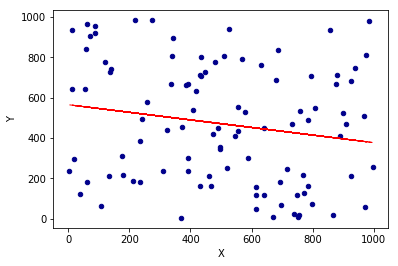

In [6]:
def plot_2D_trendline(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data, s=20, color="darkblue")
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)
    
    # the line equation:
    #TODO
    z = np.polyfit(x_data, y_data, deg=1)
    p = np.poly1d(z)
    plt.plot(x_data, p(x_data), "r--", color="red", linewidth=1)
    print ("y=%.6fx+(%.6f)" %(z[0],z[1]))

    #print Mean Squared Error
    mse = np.mean((p(x_data) - y_data) ** 2)
    print ("MeanSquaredError: ",mse)
    plt.show()

# Let's see if the function works.
plot_2D_trendline(np.random.randint(1000,size=100),np.random.randint(1000,size=100))    

### Problem 3-2 Draw scatter plot and trendline by using infant mortality rate and GDP per capita
- x-axis: *GDP per cap*, y-axis: *infant mortality*
- one plot per 5-year period (total 7 plots)
- The trend line may seem somewhat meaningless, but it isn't problem now.

y=-0.004427x+(78.883905)
MeanSquaredError:  1295.4396286804097


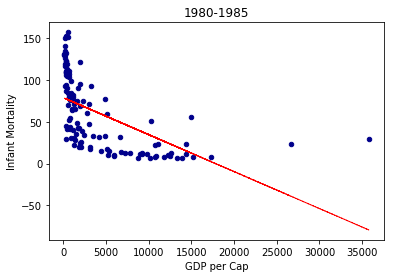

y=-0.003948x+(73.625221)
MeanSquaredError:  1067.1162957164586


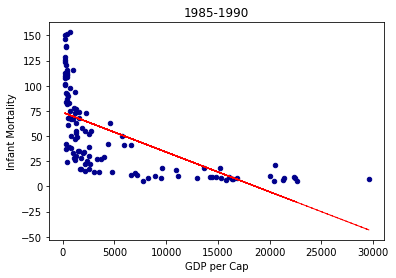

y=-0.002751x+(68.361597)
MeanSquaredError:  1423.0603393704587


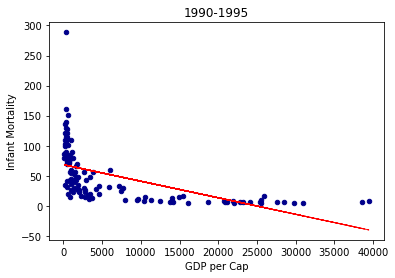

y=-0.002135x+(60.162181)
MeanSquaredError:  879.7601594345092


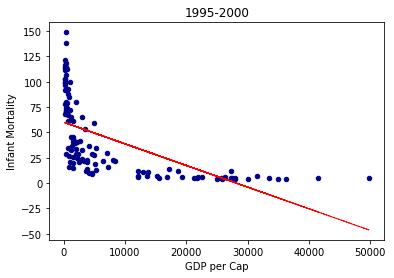

y=-0.001708x+(52.190453)
MeanSquaredError:  738.0697482201222


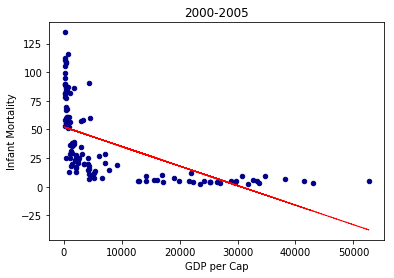

y=-0.000845x+(44.085369)
MeanSquaredError:  585.0453071941031


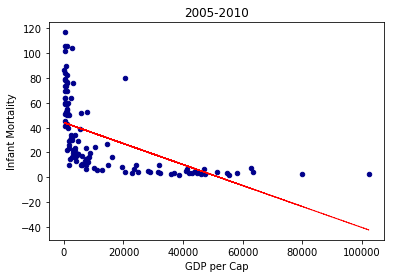

In [24]:
IMtsv_country = list(DroppedIMtsv.index)
GDPtsv_country = list(resulttsv.index)
diff_IMtsv_country = ['South Korea', 'Iran', 'Bahamas', 'Gambia', 'Congo', 'Congo_DR']
diff_GDPtsv_country = ['Korea', 'Islamic Republic of Iran', 'The Bahamas', 'The Gambia', 'Republic of Congo', 'Democratic Republic of the Congo']

IMtsv_idx = []
GDPtsv_idx = []

for n1 in range(0, len(IMtsv_country)):
    for n2 in range(0, len(GDPtsv_country)):
        if(DroppedIMtsv.index[n1] == resulttsv.index[n2]):
            IMtsv_idx.append(n1)
            GDPtsv_idx.append(n2)
            break
            
for n in range(0, len(diff_IMtsv_country)):
    IMtsv_idx.append(IMtsv_country.index(diff_IMtsv_country[n]))
    GDPtsv_idx.append(GDPtsv_country.index(diff_GDPtsv_country[n]))

for years in DroppedIMtsv.columns:
    xData=[] #GDP
    yData=[] #IM
    
    #TODO
    for i in range(0, len(IMtsv_idx)):
        xData.append(resulttsv[[years]].values[GDPtsv_idx[i]][0])
        yData.append(DroppedIMtsv[[years]].values[IMtsv_idx[i]][0])

    plot_2D_trendline(np.asarray(xData), np.asarray(yData), x_label='GDP per Cap', y_label='Infant Mortality', title=years)

### Problem 3-3 Let's make trend line meaningful.
- As mentioned, the trend line is somewhat meaningless.
- By applying a *<b>logarithmic scale</b>* on the data, you can make trendlines more meaningful.
<br/>    ** hint: Most of mathmetical functions in python can be found in numpy.*

y=-0.555929x+(7.887574)
MeanSquaredError:  0.289764132632224


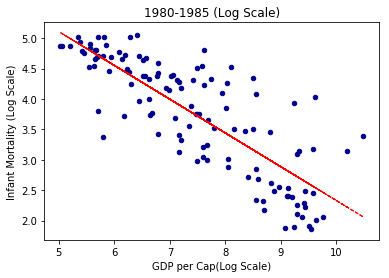

y=-0.597591x+(8.087569)
MeanSquaredError:  0.20136526842695082


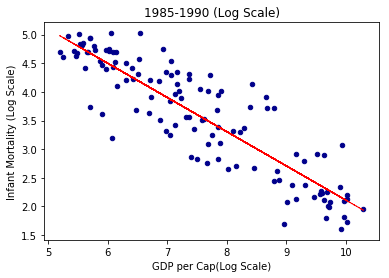

y=-0.580609x+(7.895483)
MeanSquaredError:  0.22010331164092628


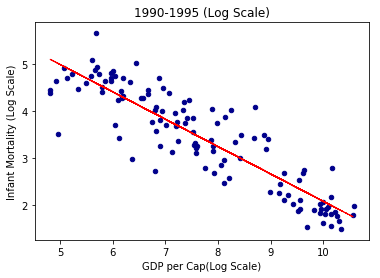

y=-0.618747x+(8.124605)
MeanSquaredError:  0.18118145299584457


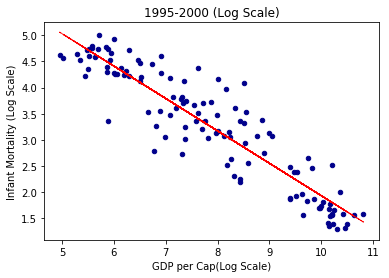

y=-0.608627x+(7.900746)
MeanSquaredError:  0.2210797487645833


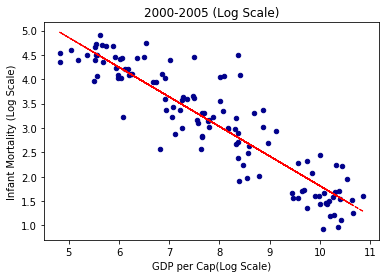

y=-0.607591x+(8.052557)
MeanSquaredError:  0.27077149480110857


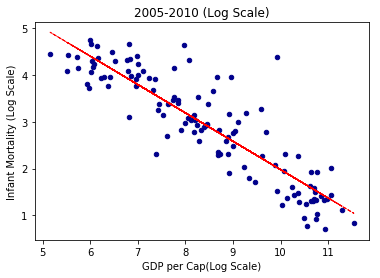

In [25]:
for years in DroppedIMtsv.columns:
    xDataLog=[]
    yDataLog=[]
    
    #TODO
    for i in range(0, len(IMtsv_idx)):
        xDataLog.append(np.log(resulttsv[[years]].values[GDPtsv_idx[i]][0]))
        yDataLog.append(np.log(DroppedIMtsv[[years]].values[IMtsv_idx[i]][0]))
    
    plot_2D_trendline(np.asarray(xDataLog), np.asarray(yDataLog), x_label='GDP per Cap(Log Scale)', y_label='Infant Mortality (Log Scale)', title=years+" (Log Scale)")

## Project Problem 2&3
- __Read Data forestfires.csv. Keep it mind this data is not tsv!__
- __Sorting & Filtering Data, each sub questions are independent, not related to each other. __
    - Filter rows which event occured in 1st quarter (January to April).
    - Filter rows where area is greater than average area value, and report average value also.
    - Sort descending order by FFMC value which event occured in Friday.
- __Draw plot with following directions, each sub questions are independent, not related to each other.__
    - Draw plot only using X, Y value, so we can know which part of park frequently fired.
    - Draw plot only using temp and wind, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using temp and RH, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using wind and RH, so we can know the relation between two features. Also draw trend line.

In [7]:
###YOUR CODE HERE###
###Read Data forestfires.csv###
FF = pd.read_csv('forestfires.csv', index_col='X') 
FF

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00


In [9]:
###YOUR CODE HERE###
###Filter rows which event occured in 1st quarter###

FF1 = FF.copy()
FF_jan = FF1.loc[FF1['month'] == 'jan']
FF_feb = FF1.loc[FF1['month'] == 'feb']
FF_mar = FF1.loc[FF1['month'] == 'mar']
FF_apr = FF1.loc[FF1['month'] == 'apr']
frames = [FF_jan, FF_feb, FF_mar, FF_apr]
filteredFF1 = pd.concat(frames)
filteredFF1

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
2,2,feb,mon,84.0,9.3,34.0,2.1,13.9,40,5.4,0.0,0.00
2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
9,9,feb,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00
9,9,feb,fri,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00
3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
4,6,feb,sat,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00
5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


In [28]:
###YOUR CODE HERE###
###Filter rows where area is greater than average area value###
FF2 = FF.copy()
avg_area = FF2["area"].mean()
FilteredFF2 = FF1.loc[FF2['area'] > avg_area]

print("Average area value: %.6f" %avg_area)
FilteredFF2

Average area value: 12.847292


,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,17.20
6,5,sep,fri,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,19.23
8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41
4,4,oct,sat,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,24.23


In [31]:
###YOUR CODE HERE###
###Sort descending order by FFMC value which event occured in Friday###
FF3 = FF.copy()
FilteredFF3 = FF3.loc[FF['day'] == 'fri']
FilteredFF3 = FilteredFF3.sort_values('FFMC', ascending=False)
FilteredFF3

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32
1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
6,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,28.74
9,9,aug,fri,94.8,227.0,706.7,12.0,25.0,36,4.0,0.0,0.00
7,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,0.00
4,5,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00
7,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13
4,4,aug,fri,94.3,167.6,684.4,13.0,21.8,53,3.1,0.0,6.54
3,4,sep,fri,94.3,85.1,692.3,15.9,19.8,50,5.4,0.0,0.00


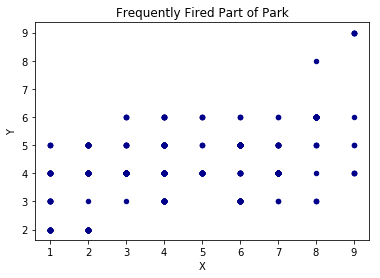

In [8]:
###YOUR CODE HERE###
###Draw plot only using X, Y value, so we can know which part of park frequently fired###

x_data = np.asarray(FF.index)
y_data = FF.iloc[:]['Y'].values
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_data, y_data, s=20, color="darkblue")
plt.title("Frequently Fired Part of Park")

plt.show()

#print(FF[['area']].values)


y=-0.070077x+(5.341306)
MeanSquaredError:  3.038551887831039


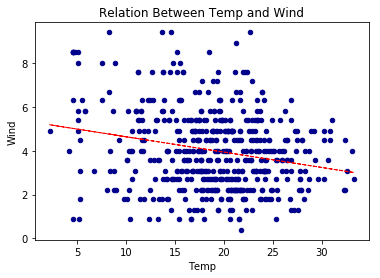

In [33]:
###YOUR CODE HERE###
###Draw plot only using temp and wind###
xData = FF.iloc[:]['temp'].values
yData = FF.iloc[:]['wind'].values
plot_2D_trendline(xData, yData, x_label='Temp', y_label='Wind', title="Relation Between Temp and Wind")

y=-1.482044x+(72.282784)
MeanSquaredError:  191.83038505390192


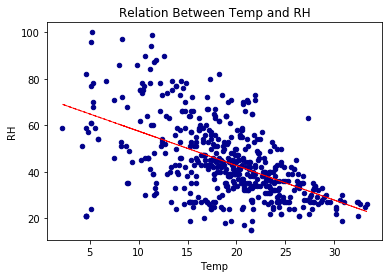

In [34]:
###YOUR CODE HERE###
###Draw plot only using temp and RH###
xData = FF.iloc[:]['temp'].values
yData = FF.iloc[:]['RH'].values
plot_2D_trendline(xData, yData, x_label='Temp', y_label='RH', title="Relation Between Temp and RH")

y=0.632152x+(41.748467)
MeanSquaredError:  264.464499139703


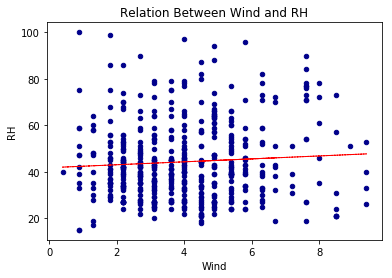

In [35]:
###YOUR CODE HERE###
###Draw plot only using wind and RH###
xData = FF.iloc[:]['wind'].values
yData = FF.iloc[:]['RH'].values
plot_2D_trendline(xData, yData, x_label='Wind', y_label='RH', title="Relation Between Wind and RH")

# FINISH